In [1]:
#
import sys
from pathlib import Path
from typing import Union, List

#
sys.path.append("./src/")
sys.path.append("./")
sys.path.append("../")
sys.path.append("../../")
sys.path.append("../../../")

import pandas as pd
from stable_baselines3 import A2C, DDPG, PPO, SAC, TD3

#
from rl.plot.plot import backtest_stats, backtest_plot, get_daily_return, get_baseline
from rl.envs.StockTradingEnv import StockTradingEnv
from rl.experiments._3_key_metrics_dow30.train import (
    CustomDRLAgent,
    get_env_kwargs,
    base_cols,
    data_cols,
    ratios_cols,
    dataset_name,
)
from rl.experiments.common.utils import init_program
from rl.experiments.common.utils import ignore_warnings
from rl.experiments.common.classes import LearnedAlgorithm

/Users/zlapik/my-drive-zlapik/0-todo/ai-investing/venv3.10/lib/python3.10/site-packages/pyfolio/pos.py:26: UserWarning: Module "zipline.assets" not found; multipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
ignore_warnings()

In [3]:
program = init_program(dataset_name)

In [4]:
print(base_cols)
print(data_cols)
print(ratios_cols)

['date', 'tic']
['open', 'high', 'low', 'close', 'volume']
['revenuePerShare', 'netIncomePerShare', 'operatingCashFlowPerShare', 'freeCashFlowPerShare', 'cashPerShare', 'bookValuePerShare', 'tangibleBookValuePerShare', 'shareholdersEquityPerShare', 'interestDebtPerShare', 'marketCap', 'enterpriseValue', 'peRatio', 'priceToSalesRatio', 'pocfratio', 'pfcfRatio', 'pbRatio', 'ptbRatio', 'evToSales', 'enterpriseValueOverEBITDA', 'evToFreeCashFlow', 'evToOperatingCashFlow', 'earningsYield', 'freeCashFlowYield', 'debtToEquity', 'debtToAssets', 'netDebtToEBITDA', 'currentRatio', 'interestCoverage', 'incomeQuality', 'dividendYield', 'payoutRatio', 'salesGeneralAndAdministrativeToRevenue', 'researchAndDdevelopementToRevenue', 'intangiblesToTotalAssets', 'capexToOperatingCashFlow', 'capexToRevenue', 'capexToDepreciation', 'stockBasedCompensationToRevenue', 'grahamNumber', 'roic', 'returnOnTangibleAssets', 'grahamNetNet', 'workingCapital', 'tangibleAssetValue', 'netCurrentAssetValue', 'investedCap

In [25]:
def get_algorithm(filename: Path):
    if "a2c" in filename.as_posix():
        return LearnedAlgorithm(algorithm="a2c", filename=filename, learned_algorithm=A2C.load(filename))


learned_algorithms = []
for filepath in program.exp_dir.out.algorithms.glob("*"):
    learned_algorithms.append(get_algorithm(filepath))
    # break

In [26]:
# Test Learned Algorithms
print(len(learned_algorithms))
for algo in learned_algorithms:
    env_kwargs = get_env_kwargs(program.dataset)
    env_gym = StockTradingEnv(df=program.dataset, **env_kwargs)
    algo.df_account_value, algo.df_actions = CustomDRLAgent.DRL_prediction(
        model=algo.learned_algorithm, environment=env_gym
    )
# algos_prediction = predicate(program, learned_algorithms)

20
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!
Stock Dimension: 29, State Space: 1712
hit end!


In [7]:
# print(learned_algorithms[0].df_actions)
# print(learned_algorithms[0].df_account_value)

In [27]:
metric = "Annual return"

for algo in learned_algorithms:
    perf_stats_all = backtest_stats(account_value=algo.df_account_value)
    algo.perf_stats_all = pd.DataFrame(perf_stats_all)

In [28]:
def print_learned_algo(algos: List[LearnedAlgorithm]):
    for i in algos:
        try:
            print(i.perf_stats_all.loc[metric][0])
        except Exception as e:
            print(f"{e}")


print_learned_algo(learned_algorithms)

0.07647808138138612
0.020651365717591963
0.07368252917960039
0.02420088758841188
0.0872761262826558
0.07115173606064062
0.09161727316913493
0.05631020395868225
0.09396945955790059
0.046979907913673014
0.08203957092213021
0.06627100994302637
0.07850858698515362
0.07668218897098966
0.03933051941139443
0.08773432357067557
0.07962170502664834
0.05701117933232425
0.07803820486042223
0.06991810123358033


In [29]:
sorted_list = sorted(learned_algorithms, key=lambda x: x.perf_stats_all.loc[metric][0])

In [30]:
# print_learned_algo(sorted_list)
# print(f"{sorted_list[len(sorted_list)].filename}")

best_idx = len(sorted_list) - 1
worst_idk = 0


def get_annual_return(algo: LearnedAlgorithm):
    return algo.perf_stats_all.loc[metric][0]


print(f"{get_annual_return(sorted_list[best_idx])}:  {sorted_list[best_idx].filename.name}")
print(f"{get_annual_return(sorted_list[worst_idk])}:  {sorted_list[worst_idk].filename.name}")

0.09396945955790059:  a2c_2022-12-21T12-23-03_170000.zip
0.020651365717591963:  a2c_2022-12-21T12-23-03_50000.zip


In [31]:
stats = backtest_stats(sorted_list[best_idx].df_account_value)
stats

Annual return          0.093969
Cumulative returns     0.391997
Annual volatility      0.229018
Sharpe ratio           0.507443
Calmar ratio           0.295227
Stability              0.732234
Max drawdown          -0.318295
Omega ratio            1.107032
Sortino ratio          0.714722
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.919129
Daily value at risk   -0.028392
dtype: float64

In [32]:
start = program.dataset["date"].min()
end = program.dataset["date"].max()
print(f"Start: {start}  -  End: {end}")

Start: 2019-04-12  -  End: 2022-12-15


In [33]:
# Baseline
baseline_df = get_baseline("^DJI", start, end)

In [34]:
baseline_df

,date,open,high,low,close,volume,dividends,stock splits
Date,,,,,,,,
2019-04-12,2019-04-12,26357.789062,26436.679688,26309.720703,26412.300781,369910000,0.0,0.0
2019-04-15,2019-04-15,26407.759766,26424.849609,26316.419922,26384.769531,250620000,0.0,0.0
2019-04-16,2019-04-16,26482.189453,26530.710938,26397.189453,26452.660156,302340000,0.0,0.0
2019-04-17,2019-04-17,26468.529297,26501.019531,26391.859375,26449.539062,367780000,0.0,0.0
2019-04-18,2019-04-18,26463.369141,26602.419922,26444.529297,26559.539062,332850000,0.0,0.0
...,...,...,...,...,...,...,...,...
2022-12-08,2022-12-08,33695.968750,33899.171875,33642.460938,33781.480469,271830000,0.0,0.0
2022-12-09,2022-12-09,33746.710938,33844.628906,33462.648438,33476.460938,287630000,0.0,0.0
2022-12-12,2022-12-12,33519.500000,34005.039062,33519.500000,34005.039062,313440000,0.0,0.0


In [35]:
print(baseline_df.index.min())
print(baseline_df.index.max())

2019-04-12
2022-12-14


In [36]:
stats = backtest_stats(baseline_df, value_col_name="close")

stats

Annual return          0.070772
Cumulative returns     0.286005
Annual volatility      0.232728
Sharpe ratio           0.411239
Calmar ratio           0.190831
Stability              0.561379
Max drawdown          -0.370862
Omega ratio            1.087791
Sortino ratio          0.567932
Skew                        NaN
Kurtosis                    NaN
Tail ratio             0.953450
Daily value at risk   -0.028941
dtype: float64

Start date,2019-04-12
End date,2022-12-14
Total months,44
,Backtest
Annual return,7.077%
Cumulative returns,28.601%
Annual volatility,23.273%
Sharpe ratio,0.41
Calmar ratio,0.19
Stability,0.56
Max drawdown,-37.086%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,37.09,2020-02-12,2020-03-23,2020-11-16,199
1,21.94,2022-01-04,2022-09-30,NaT,NaN
2,6.91,2019-04-23,2019-05-31,2019-06-20,43
3,6.87,2019-07-15,2019-08-14,2019-11-04,81
4,6.62,2021-11-08,2021-12-01,2021-12-29,38


Stress Events,mean,min,max
New Normal,0.04%,-12.93%,11.37%


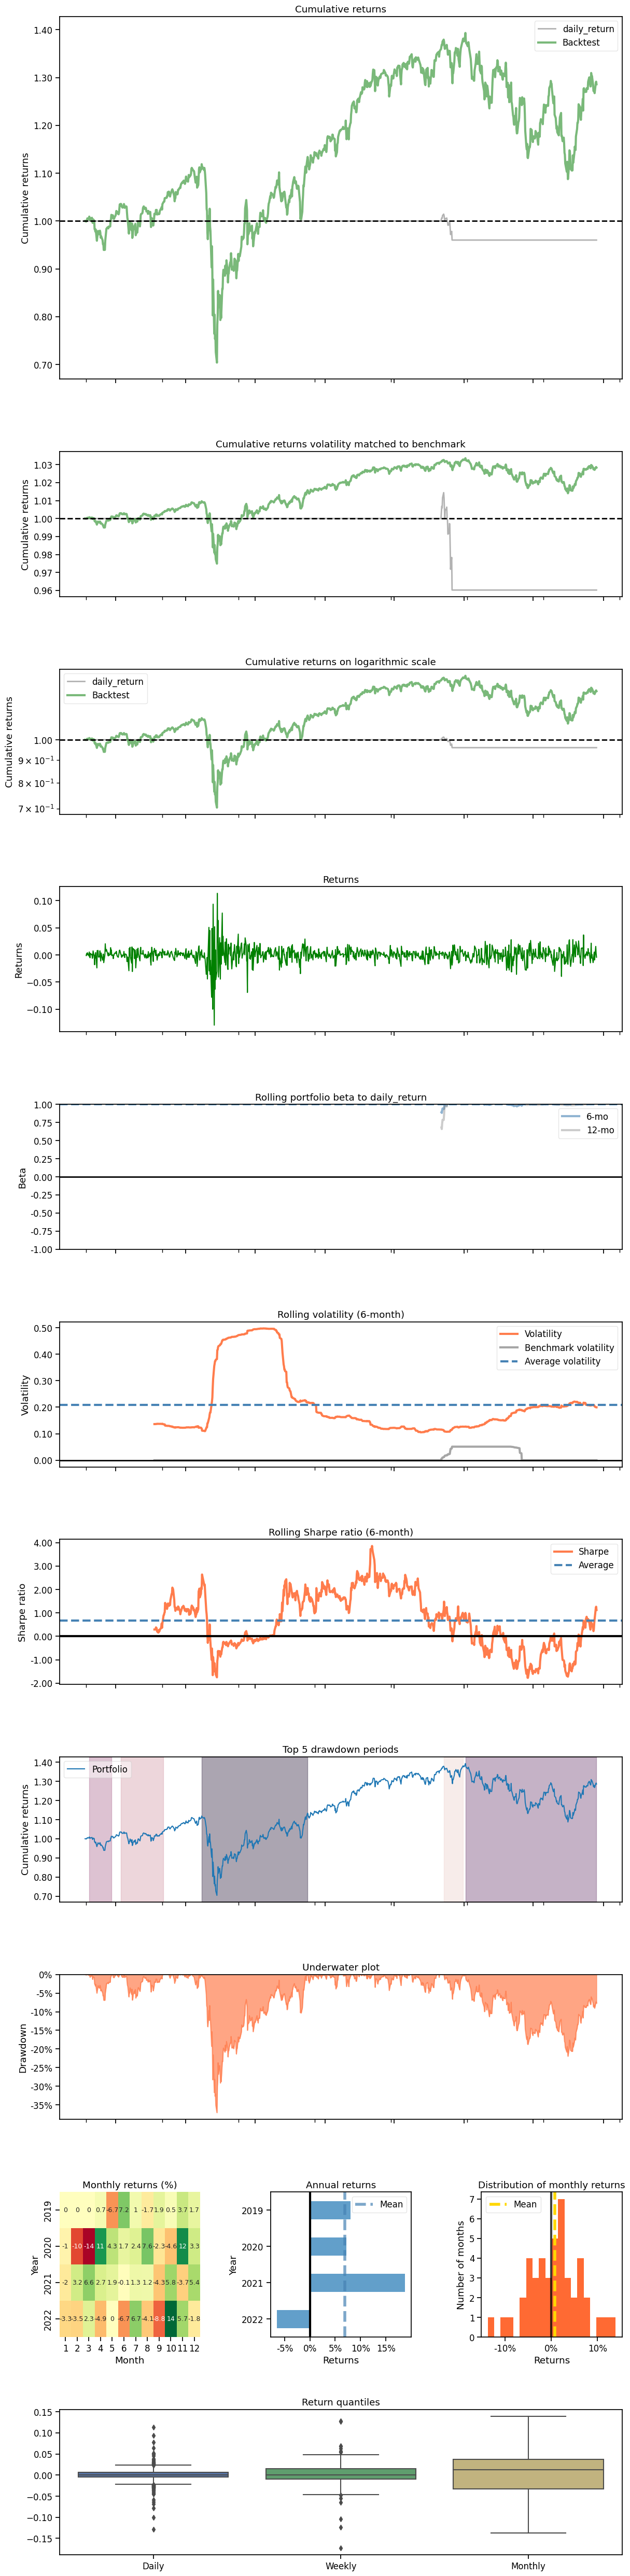

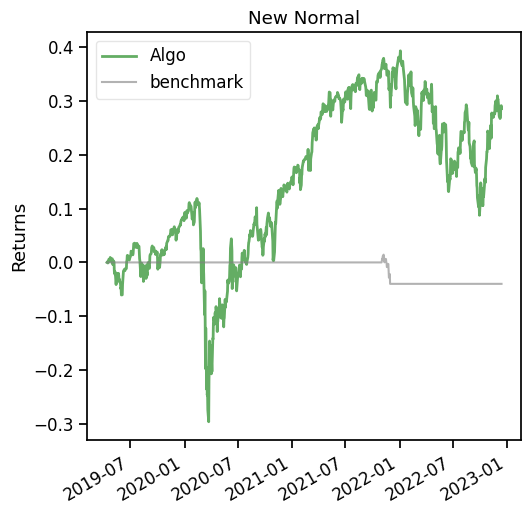

In [37]:
%matplotlib inline
backtest_plot(baseline_df, value_col_name="close")